In [49]:
# Imports 
import numpy as np
import matplotlib.pyplot as plt 
from astropy import units as u
from astropy import constants as astrocst
import pandas as pd
import scipy
import scipy.constants as cst
import artpop

# artpop's matplotlib style
plt.style.use(artpop.mpl_style)

# pd output style
pd.set_option('display.float_format','{:.6e}'.format)

In [50]:
# read in data
file_path = 'stellarmodel-ps03.txt'

df = pd.read_csv(file_path, sep="   ", comment='#', names = ['radius', 'density', 'temperature'])
df
# df.drop([0,1], inplace= True)
# df.reset_index(inplace= True, drop=True)
# df = df.astype(dtype = np.float64)

C:\Users\Dennis Wu\AppData\Local\Temp\ipykernel_47616\1423433413.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, sep="   ", comment='#', names = ['radius', 'density', 'temperature'])


,radius,density,temperature
0,2.118055e+08,1.959849e+01,2.806273e+07
1,1.463201e+09,1.957532e+01,2.804286e+07
2,2.714596e+09,1.952211e+01,2.799721e+07
3,3.965992e+09,1.943708e+01,2.792418e+07
4,5.217387e+09,1.931658e+01,2.782046e+07
...,...,...,...
195,2.442339e+11,3.134242e-07,1.087600e+05
196,2.454853e+11,1.447740e-07,8.525742e+04
197,2.467367e+11,5.331856e-08,6.436504e+04
198,2.479881e+11,1.472920e-08,3.997786e+04


Text(0, 0.5, '$m(r)/M_\\odot$')

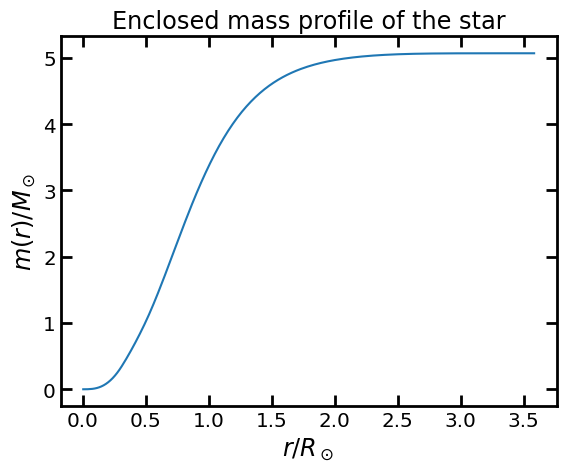

In [51]:
import scipy.integrate as integrate
SOLAR_MASS = 1.9891e33
SOLAR_RADIUS = 6.9551e10

integrand = 4*cst.pi*np.multiply(df['density'], np.power(df['radius'],2)) # 4*pi*r^2*rho dr
mass = integrate.cumulative_trapezoid(integrand, x=df['radius'], initial=0)

plt.plot(df['radius']/SOLAR_RADIUS, mass/SOLAR_MASS)
plt.title("Enclosed mass profile of the star")
plt.xlabel(r'$r/R_\odot$')
plt.ylabel(r'$m(r)/M_\odot$')

Text(0, 0.5, '$g(r)$  [cm/s$^2$]')

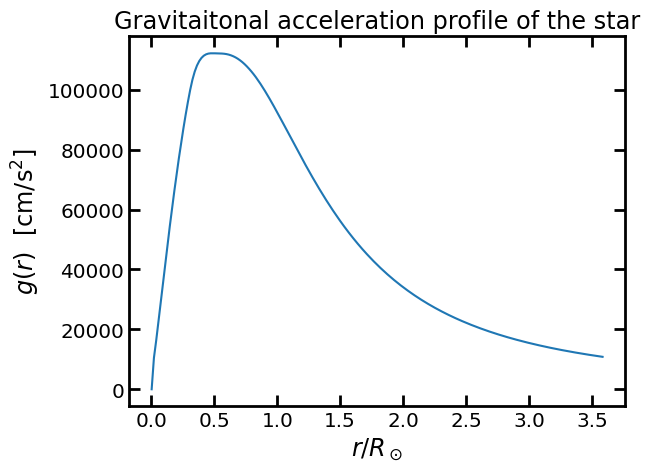

In [52]:
grav = mass*cst.G*1e3/np.power(df['radius'],2)
plt.plot(df['radius']/SOLAR_RADIUS, grav)
plt.title("Gravitaitonal acceleration profile of the star")
plt.xlabel(r'$r/R_\odot$')
plt.ylabel(r'$g(r)$  [cm/s$^2$]')

Text(0, 0.5, '$P(r)$ [g/cm s$^2$]')

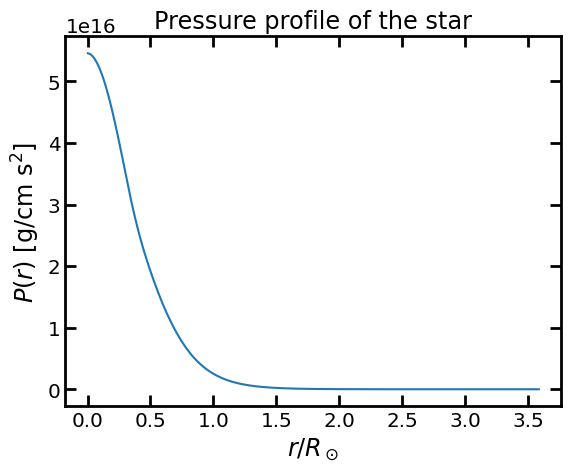

In [54]:
dp = -np.multiply(grav, df['density'])
pressure = integrate.cumulative_trapezoid(dp, x=df['radius'], initial=0)
pressure = pressure - pressure[-1]
plt.plot(df['radius']/SOLAR_RADIUS, pressure)
plt.title("Pressure profile of the star")
plt.xlabel(r'$r/R_\odot$')
plt.ylabel(r'$P(r)$ [g/cm s$^2$]')

Text(0, 0.5, '$\\mu(r)$ [g]')

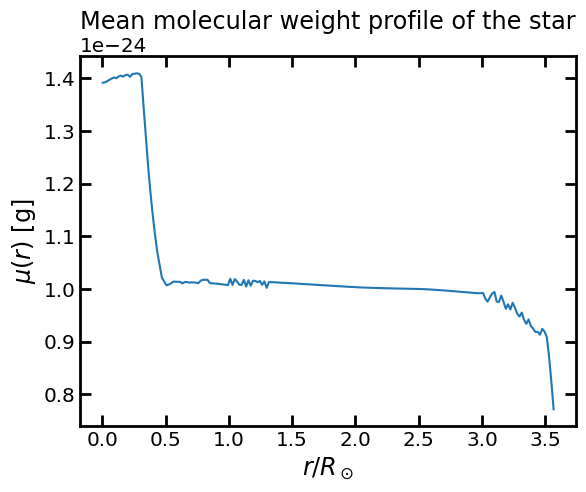

In [55]:
mu = np.divide(np.multiply(df['density'], df['temperature'])*cst.k*1e7, pressure)
plt.plot(df['radius']/SOLAR_RADIUS, mu)
plt.title("Mean molecular weight profile of the star")
plt.xlabel(r'$r/R_\odot$')
plt.ylabel(r'$\mu(r)$ [g]')

Text(0, 0.5, '$dT/dr$ [K/cm]')

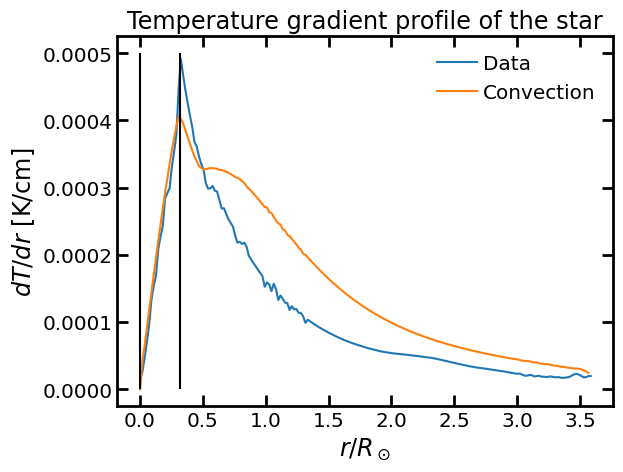

In [76]:
gamma = 1.666667
dT =  np.absolute(np.gradient(df['temperature'],df['radius']))
dT_ad =  np.absolute(np.absolute(dp)*np.divide(df['temperature'], pressure)*(gamma-1)/gamma)
plt.plot(df['radius']/SOLAR_RADIUS, dT, label = 'Data')
plt.plot(df['radius']/SOLAR_RADIUS, dT_ad,  label = 'Convection')
plt.vlines(x = 0, ymin = 0, ymax = 0.0005, colors = 'black')
plt.vlines(x = 0.32, ymin = 0, ymax = 0.0005, colors = 'black')
plt.legend()
plt.title("Temperature gradient profile of the star")
plt.xlabel(r'$r/R_\odot$')
plt.ylabel(r'$dT/dr$ [K/cm]')